<a href="https://colab.research.google.com/github/syh0397/Charter-Dashboard-for-Newbies/blob/main/%08%EC%83%9D%ED%99%9C%EC%A0%90%EC%88%98_%EC%86%8C%EC%9D%8C%EC%A0%90%EC%88%98_%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
import requests
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/DATA/비저블 맵 프로젝트/진짜 사용할 데이터/서울시전월세_점수추가.csv')
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])
df

,자치구명,법정동코드,법정동명,지번주소,건물명,층,임대건물명,임대면적,전월세구분,보증금,...,latitude,longitude,conv_num,in_din_total_300,in_mart_total_1000,in_subway_total_500,in_hosp_total_1000,in_cafe_total_300,police_500,center_500
0,영등포구,11300,당산동3가,서울특별시 영등포구 당산동3가 398-1,당산파크뷰,3,오피스텔,16.83,준월세,3000,...,37.525786,126.894982,18,325,7,2,128,69,0,2
1,영등포구,11300,당산동3가,서울특별시 영등포구 당산동3가 398-1,당산파크뷰,6,오피스텔,17.42,준전세,15000,...,37.525786,126.894982,18,325,7,2,128,69,0,2
2,영등포구,10300,영등포동2가,서울특별시 영등포구 영등포동2가 175,여의도 해링턴타워 196,12,오피스텔,18.10,준월세,1000,...,37.519263,126.909762,24,330,4,2,133,21,2,1
3,영등포구,10300,영등포동2가,서울특별시 영등포구 영등포동2가 175,여의도 해링턴타워 196,14,오피스텔,18.10,준월세,1000,...,37.519263,126.909762,24,330,4,2,133,21,2,1
4,영등포구,10300,영등포동2가,서울특별시 영등포구 영등포동2가 175,여의도 해링턴타워 196,11,오피스텔,18.10,준월세,1000,...,37.519263,126.909762,24,330,4,2,133,21,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,관악구,10100,봉천동,서울특별시 관악구 봉천동 886-63,(886-63),1,다세대/연립,32.27,월세,500,...,37.483353,126.949078,16,155,3,1,225,21,1,1
1186,관악구,10100,봉천동,서울특별시 관악구 봉천동 941-2,삼성,3,아파트,64.12,준전세,11000,...,37.485960,126.940335,9,169,2,1,143,24,2,1
1187,동작구,10200,상도동,서울특별시 동작구 상도동 488,강남아파트,5,아파트,54.41,준월세,1000,...,37.496943,126.953539,10,125,2,1,59,24,2,1
1188,동작구,10200,상도동,서울특별시 동작구 상도동 488,강남아파트,4,아파트,48.83,준월세,3000,...,37.496943,126.953539,10,125,2,1,59,24,2,1


In [4]:
class KakaoLocalAPI:
    """
    Kakao Local API 컨트롤러
    """

    def __init__(self, rest_api_key):
        """
        Rest API키 초기화 및 기능 별 URL 설정
        """

        # REST API 키 설정
        self.rest_api_key = '650c8233432728848e448a6d76f3f155'
        self.headers = {"Authorization": "KakaoAK {}".format(rest_api_key)}

        # 서비스 별 URL 설정

        # 01 주소 검색
        self.URL_01 = "https://dapi.kakao.com/v2/local/search/address.json"
        # 02 좌표-행정구역정보 변환
        self.URL_02 = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json"
        # 03 좌표-주소 변환
        self.URL_03 = "https://dapi.kakao.com/v2/local/geo/coord2address.json"
        # 04 좌표계 변환
        self.URL_04 = "https://dapi.kakao.com/v2/local/geo/transcoord.json"
        # 05 키워드 검색
        self.URL_05 = "https://dapi.kakao.com/v2/local/search/keyword.json"
        # 06 카테고리 검색
        self.URL_06 = "https://dapi.kakao.com/v2/local/search/category.json"

    def search_address(self, query, analyze_type=None, page=None, size=None):
        """
        01 주소 검색
        """
        params = {"query": f"{query}"}

        if analyze_type != None:
            params["analyze_type"] = f"{analyze_type}"

        if page != None:
            params['page'] = f"{page}"

        if size != None:
            params['size'] = f"{size}"

        res = requests.get(self.URL_01, headers=self.headers, params=params)
        document = json.loads(res.text)

        return document
    
    def geo_coord2regioncode(self, x, y, input_coord=None, output_coord=None):
        """
        02 좌표-행정구역정보 변환
        """
        params = {"x": f"{x}",
                  "y": f"{y}"}
        
        if input_coord != None:
            params['input_coord'] = f"{input_coord}"
        
        if output_coord != None:
            params['output_coord'] = f"{output_coord}"
            
        res = requests.get(self.URL_02, headers=self.headers, params=params)
        document = json.loads(res.text)
        
        return document
        
    
    def geo_coord2address(self, x, y, input_coord=None):
        """
        03 좌표-주소 변환
        """
        params = {"x": f"{x}",
                  "y": f"{y}"}
        
        if input_coord != None:
            params['input_coord'] = f"{input_coord}"
            
        res = requests.get(self.URL_03, headers=self.headers, params=params)
        document = json.loads(res.text)
        
        return document
        
    
    def geo_transcoord(self, x, y, output_coord, input_coord=None):
        """
        04 좌표계 변환
        """
        params = {"x": f"{x}",
                  "y": f"{y}",
                  "output_coord": f"{output_coord}"}
        
        if input_coord != None:
            params['input_coord'] = f"{input_coord}"
        
        res = requests.get(self.URL_04, headers=self.headers, params=params)
        document = json.loads(res.text)
        
        return document
        
    
    def search_keyword(self,query,category_group_code=None,x=None,y=None,radius=None,rect=None,page=None,size=None,sort=None):
        """
        05 키워드 검색
        """
        params = {"query": f"{query}"}
        
        if category_group_code != None:
            params['category_group_code'] = f"{category_group_code}"
        if x != None:
            params['x'] = f"{x}"
        if y != None:
            params['y'] = f"{y}"
        if radius != None:
            params['radius'] = f"{radius}"
        if rect != None:
            params['rect'] = f"{rect}"
        if page != None:
            params['page'] = f"{page}"
        if size != None:
            params['size'] = f"{params}"
        if sort != None:
            params['sort'] = f"{sort}"
        
        res = requests.get(self.URL_05, headers=self.headers, params=params)
        document = json.loads(res.text)
        
        return document
    
            
        
    def search_category(self, category_group_code, x, y, radius=None, rect=None, page=None, size=None, sort=None):
        """
        06 카테고리 검색
        """
        params = {'category_group_code': f"{category_group_code}",
                  'x': f"{x}",
                  'y': f"{y}"}
        
        if radius != None:
            params['radius'] = f"{radius}"
        if rect != None:
            params['rect'] = f"{rect}"
        if page != None:
            params['page'] = f"{page}"
        if size != None:
            params['size'] = f"{size}"
        if sort != None:
            params['sort'] = f"{sort}"
            
        res = requests.get(self.URL_06, headers=self.headers, params=params)
        document = json.loads(res.text)
        
        return document

In [5]:
# REST API 키
rest_api_key = "650c8233432728848e448a6d76f3f155"

kakao = KakaoLocalAPI(rest_api_key)

## 음식점 50미터 안 

In [17]:
in_din_total_50 = []
office = []

for i in range(len(df)):
  # 음식점 
  category_group_code = "FD6"
  x = df['longitude'][i]
  y = df['latitude'][i]
  radius = 50

  ## Request
  result_ = kakao.search_category(category_group_code, x, y, radius)
  # 확인용 (places)
  # places = requests.get(url, params=params, headers=headers).json()['documents']
  
  Dini_total_count = result_['meta']['total_count']
  in_din_total_50.append(Dini_total_count)

# 데이터 프레임
num = pd.DataFrame()
num['in_din_total_50'] = in_din_total_50

In [18]:
num

,in_din_total_50
0,8
1,8
2,2
3,2
4,2
...,...
1185,0
1186,13
1187,15
1188,15


In [19]:
df['in_din_total_50'] = in_din_total_50

## 지하철 50미터안 

In [20]:
in_subway_total_50 = []
office = []

for i in range(len(df)):
  # 음식점 
  category_group_code = "SW8"
  x = df['longitude'][i]
  y = df['latitude'][i]
  radius = 50

  ## Request
  result_ = kakao.search_category(category_group_code, x, y, radius)
  # 확인용 (places)
  # places = requests.get(url, params=params, headers=headers).json()['documents']
  
  total_count = result_['meta']['total_count']
  in_subway_total_50.append(total_count)

# 데이터 프레임
num = pd.DataFrame()
num['in_subway_total_50'] = in_subway_total_50

In [21]:
df['in_subway_total_50'] = in_subway_total_50

In [44]:
## 점수 추가 완성 
df.to_csv('/content/drive/MyDrive/DATA/비저블 맵 프로젝트/Real_Score')

## 시각화 & 점수

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DATA/비저블 맵 프로젝트/Real_Score')
df.head()

,Unnamed: 0,자치구명,법정동코드,법정동명,지번주소,건물명,층,임대건물명,임대면적,전월세구분,...,conv_num,in_din_total_300,in_mart_total_1000,in_subway_total_500,in_hosp_total_1000,in_cafe_total_300,police_500,center_500,in_din_total_50,in_subway_total_50
0,0,영등포구,11300,당산동3가,서울특별시 영등포구 당산동3가 398-1,당산파크뷰,3,오피스텔,16.83,준월세,...,18,325,7,2,128,69,0,2,8,0
1,1,영등포구,11300,당산동3가,서울특별시 영등포구 당산동3가 398-1,당산파크뷰,6,오피스텔,17.42,준전세,...,18,325,7,2,128,69,0,2,8,0
2,2,영등포구,10300,영등포동2가,서울특별시 영등포구 영등포동2가 175,여의도 해링턴타워 196,12,오피스텔,18.10,준월세,...,24,330,4,2,133,21,2,1,2,0
3,3,영등포구,10300,영등포동2가,서울특별시 영등포구 영등포동2가 175,여의도 해링턴타워 196,14,오피스텔,18.10,준월세,...,24,330,4,2,133,21,2,1,2,0
4,4,영등포구,10300,영등포동2가,서울특별시 영등포구 영등포동2가 175,여의도 해링턴타워 196,11,오피스텔,18.10,준월세,...,24,330,4,2,133,21,2,1,2,0


In [7]:
df.columns

Index(['Unnamed: 0', '자치구명', '법정동코드', '법정동명', '지번주소', '건물명', '층', '임대건물명',
       '임대면적', '전월세구분', '보증금', '임대료', '건축년도', '연식', 'latitude', 'longitude',
       'conv_num', 'in_din_total_300', 'in_mart_total_1000',
       'in_subway_total_500', 'in_hosp_total_1000', 'in_cafe_total_300',
       'police_500', 'center_500', 'in_din_total_50', 'in_subway_total_50'],
      dtype='object')

#### 소음점수 

음식점


(<matplotlib.axes._subplots.AxesSubplot at 0x7f8ad87f0e90>, 0     336
 1     103
 2     119
 3      80
 4      51
 5      46
 6      51
 7      65
 8      41
 9      18
 10     29
 11     11
 12     16
 13     37
 14     13
 15     40
 16     15
 17      4
 18      3
 19     15
 20      6
 21      9
 22     18
 23     11
 24      3
 25      7
 26      9
 27      5
 28      1
 29      1
 30      7
 31      5
 32      4
 34      1
 40      2
 42      2
 45      5
 51      1
 Name: in_din_total_50, dtype: int64)

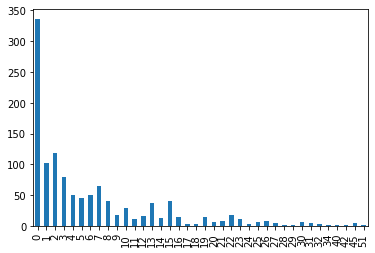

In [43]:
k = df['in_din_total_50'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar'),k

지하철


0    1171
1      19
Name: in_subway_total_50, dtype: int64


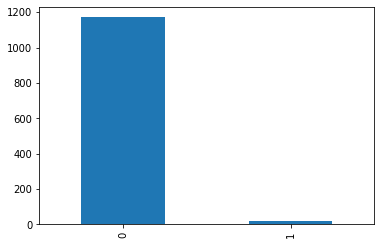

In [50]:
k = df['in_subway_total_50'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar');
print(k)

#### 생활점수

500미터 이내에 지하철역

0    403
1    562
2    212
3     13
Name: in_subway_total_500, dtype: int64


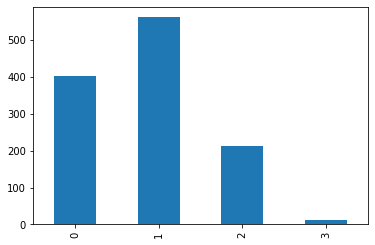

In [51]:

k = df['in_subway_total_500'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar');
print(k)

300 미터 이내에 편의점 conv_num

0      3
1      9
2     32
3     34
4     35
5     75
6     95
7     76
8     79
9     55
10    83
11    79
12    48
13    52
14    38
15    46
16    36
17    24
18    22
19    26
20    23
21    23
22    17
23    41
24    54
25    18
26    18
27     4
28    30
29     2
30     9
31     4
Name: conv_num, dtype: int64


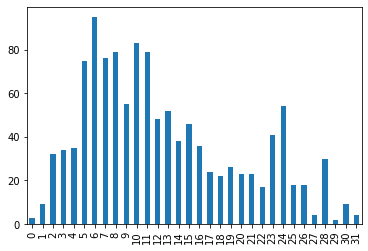

In [53]:
k = df['conv_num'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar');
print(k)

300 미터 이내에 음식점 in_din_total_300

0       3
1       8
2       7
3       2
5      10
       ..
594     1
605     2
642     5
681     1
693     5
Name: in_din_total_300, Length: 323, dtype: int64


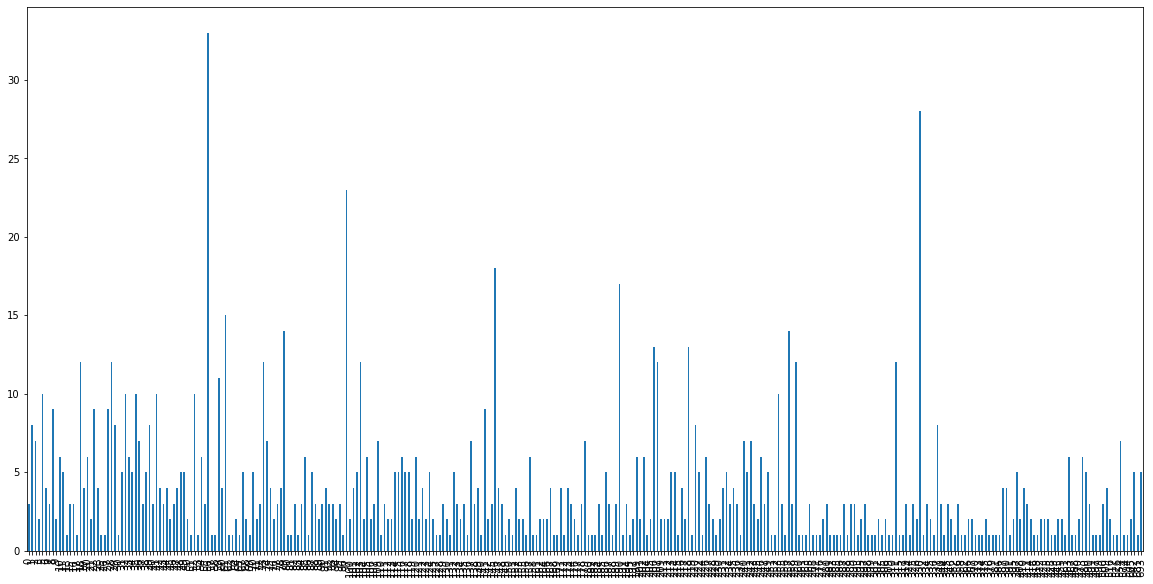

In [59]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

k = df['in_din_total_300'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar');
print(k)

300미터 이내에 카페 in_cafe_total_300

0       8
1      16
2      15
3      16
4      15
       ..
136     1
139     5
144     1
154     1
168     3
Name: in_cafe_total_300, Length: 112, dtype: int64


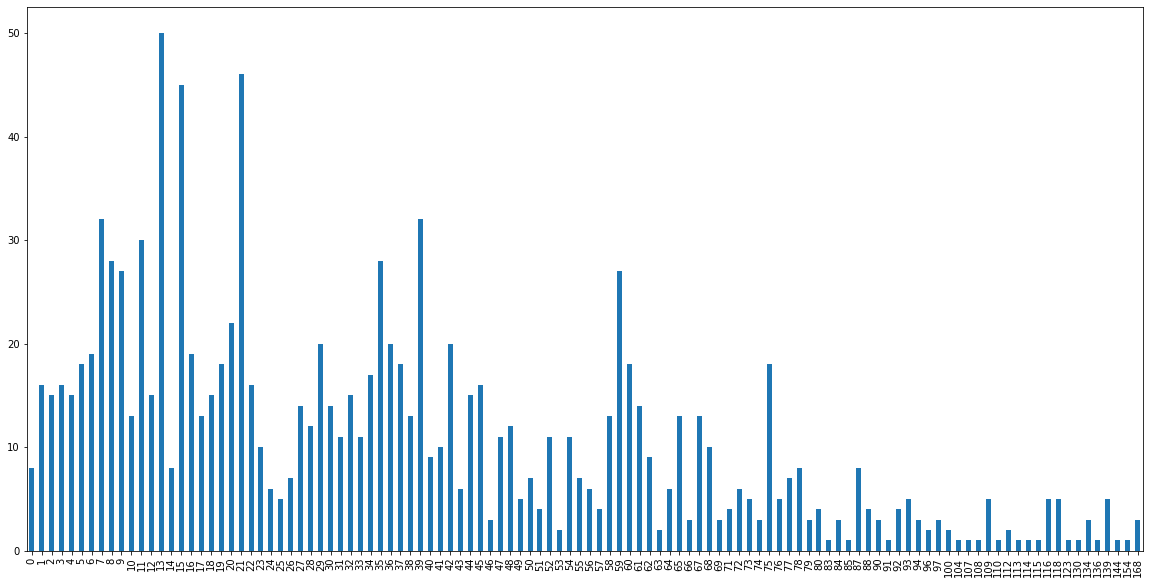

In [60]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

k = df['in_cafe_total_300'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar');
print(k)

500미터 이내에 경찰서 police_500

0    414
1    429
2    210
3     97
4     23
5     12
6      5
Name: police_500, dtype: int64


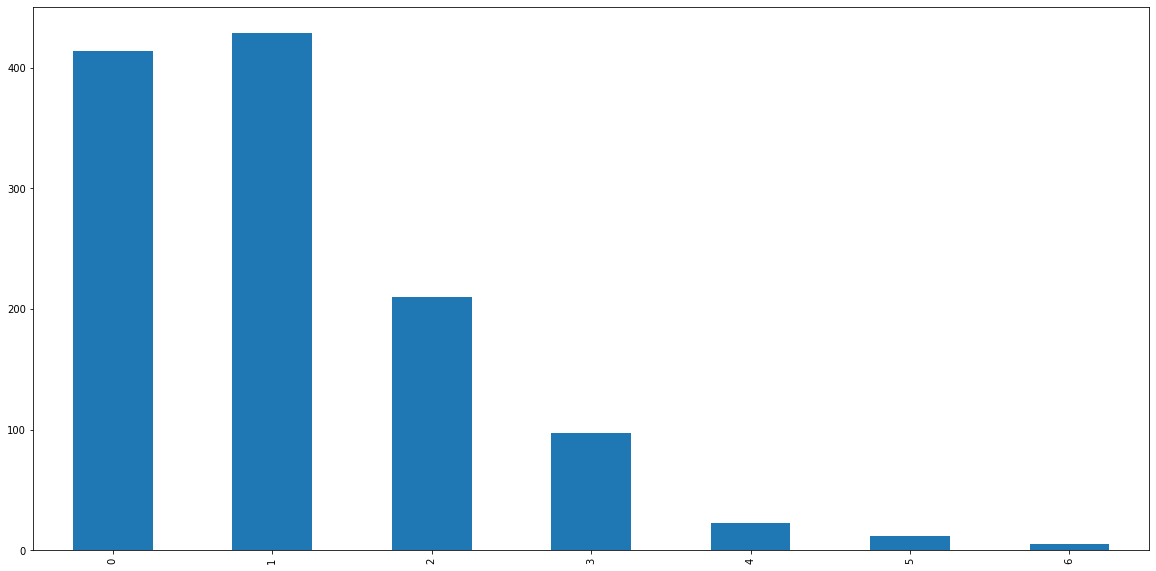

In [61]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

k = df['police_500'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar');
print(k)

500미터 이내에 동사무소 center_500

0    345
1    536
2    264
3     42
4      3
Name: center_500, dtype: int64


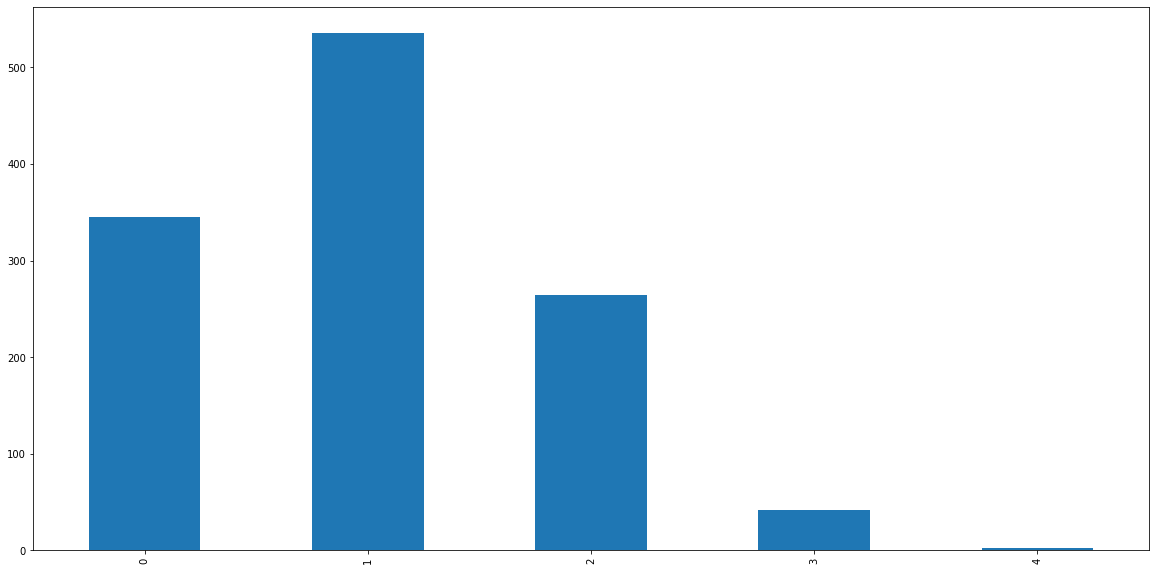

In [62]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

k = df['center_500'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar');
print(k)

1km 이내에 병원 in_hosp_total_1000

0      1
2      1
5      1
6      9
9      1
      ..
755    1
764    1
765    1
773    5
790    1
Name: in_hosp_total_1000, Length: 311, dtype: int64


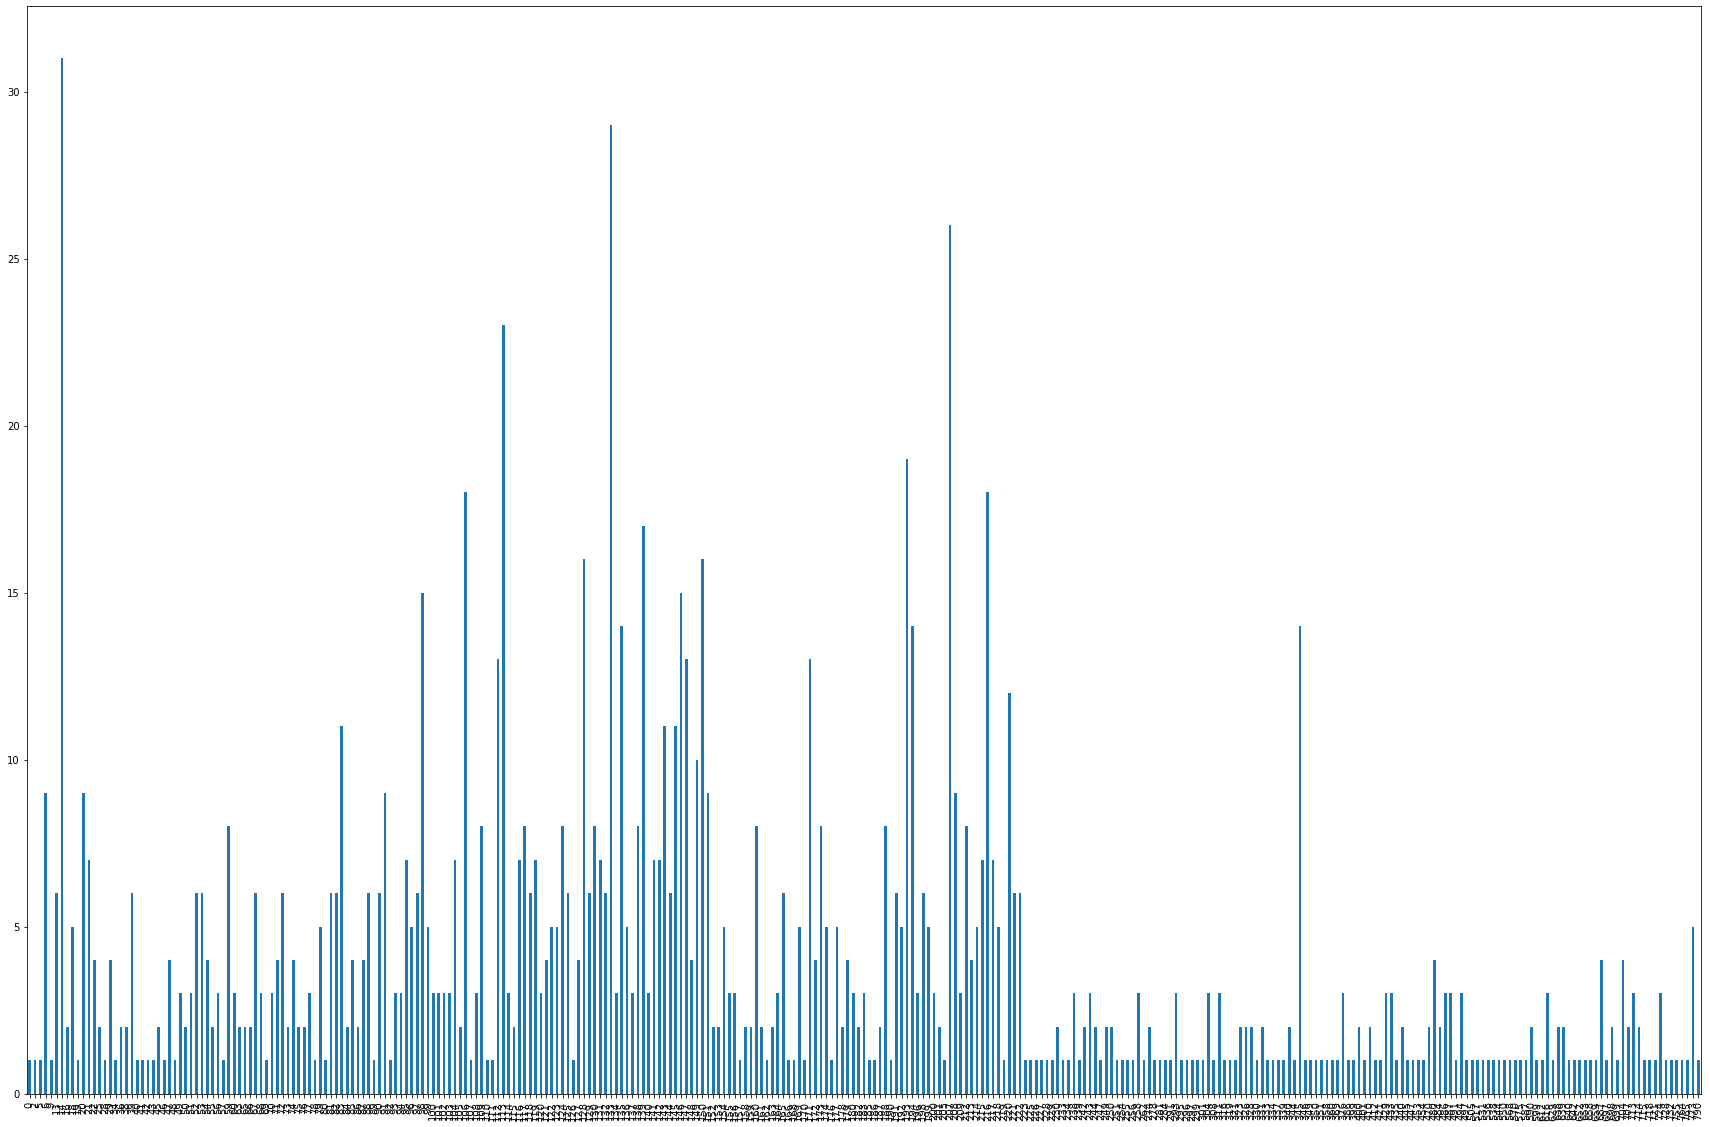

In [65]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,20)

k = df['in_hosp_total_1000'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar');
print(k)

1km 이내에 대형마트 in_mart_total_1000

0      19
1      71
2     167
3     241
4     241
5     233
6     140
7      35
8      24
9       7
10      3
11      5
12      4
Name: in_mart_total_1000, dtype: int64


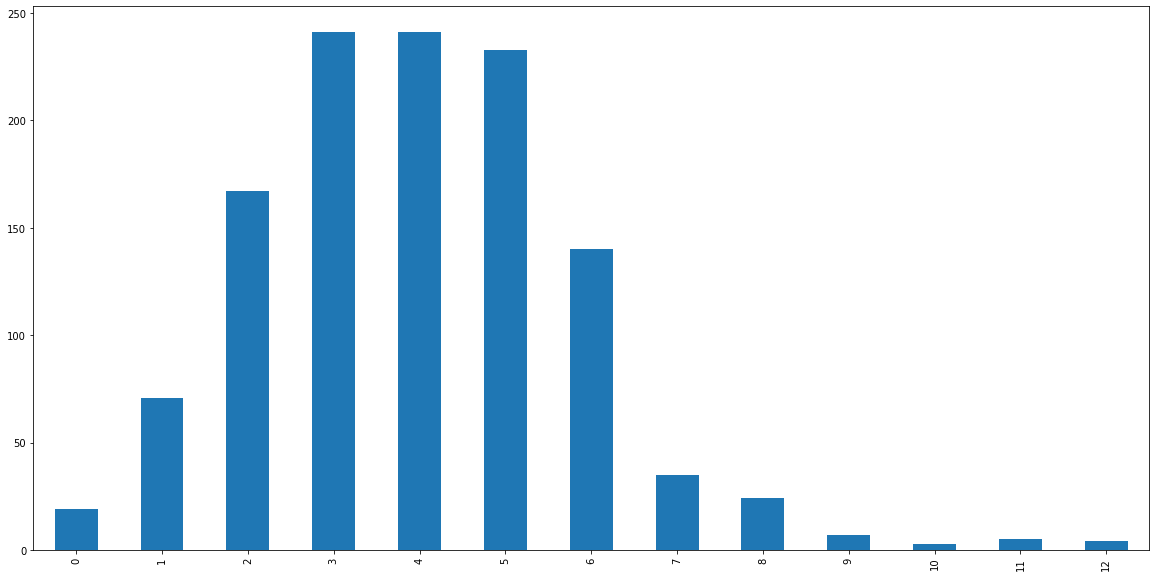

In [64]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

k = df['in_mart_total_1000'].value_counts().sort_index(ascending = True)

k.plot(kind = 'bar');
print(k)

## 로버스트 스캐일러

#### 바꿀것들만 떼어내기 

In [8]:
robust = df[['conv_num',
       'in_din_total_300', 'in_mart_total_1000', 'in_subway_total_500',
       'in_hosp_total_1000', 'in_cafe_total_300', 'police_500', 'center_500',
       'in_din_total_50', 'in_subway_total_50']]

In [9]:
import sklearn
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_robust = scaler.fit_transform(robust)
df_robust = pd.DataFrame(df_robust, columns = ['conv_num',
       'in_din_total_300', 'in_mart_total_1000', 'in_subway_total_500',
       'in_hosp_total_1000', 'in_cafe_total_300', 'police_500', 'center_500',
       'in_din_total_50', 'in_subway_total_50'])
df_robust

,conv_num,in_din_total_300,in_mart_total_1000,in_subway_total_500,in_hosp_total_1000,in_cafe_total_300,police_500,center_500,in_din_total_50,in_subway_total_50
0,0.7,0.997326,1.5,1.0,-0.129630,0.926829,-0.5,0.5,0.571429,0.0
1,0.7,0.997326,1.5,1.0,-0.129630,0.926829,-0.5,0.5,0.571429,0.0
2,1.3,1.024064,0.0,1.0,-0.083333,-0.243902,0.5,0.0,-0.114286,0.0
3,1.3,1.024064,0.0,1.0,-0.083333,-0.243902,0.5,0.0,-0.114286,0.0
4,1.3,1.024064,0.0,1.0,-0.083333,-0.243902,0.5,0.0,-0.114286,0.0
...,...,...,...,...,...,...,...,...,...,...
1185,0.5,0.088235,-0.5,0.0,0.768519,-0.243902,0.0,0.0,-0.342857,0.0
1186,-0.2,0.163102,-1.0,0.0,0.009259,-0.170732,0.5,0.0,1.142857,0.0
1187,-0.1,-0.072193,-1.0,0.0,-0.768519,-0.170732,0.5,0.0,1.371429,0.0
1188,-0.1,-0.072193,-1.0,0.0,-0.768519,-0.170732,0.5,0.0,1.371429,0.0


#### 생활점수

In [10]:
# in_din_total_300 ,  conv_num

in_din_total_300 = df_robust['in_din_total_300']
in_din_total_300 = round((in_din_total_300/14)*100,2)

in_cafe_total_300 = df_robust['in_cafe_total_300'] 
in_cafe_total_300 = round((in_cafe_total_300/14)*100,2)

conv_din = pd.DataFrame()
conv_din['cafe_score'] = in_cafe_total_300
conv_din['din_score'] = in_din_total_300

score = in_cafe_total_300 + in_din_total_300
conv_din['score'] = score
conv_din

,cafe_score,din_score,score
0,6.62,7.12,13.74
1,6.62,7.12,13.74
2,-1.74,7.31,5.57
3,-1.74,7.31,5.57
4,-1.74,7.31,5.57
...,...,...,...
1185,-1.74,0.63,-1.11
1186,-1.22,1.17,-0.05
1187,-1.22,-0.52,-1.74
1188,-1.22,-0.52,-1.74


### 점수화 만들기 

In [41]:
number = df[['conv_num',
        'in_mart_total_1000', 'in_subway_total_500',
       'in_hosp_total_1000',  'police_500', 'center_500']]
       
noisy = df[['in_din_total_50', 'in_subway_total_50', 'in_subway_total_500']]

In [13]:
number.describe()

,conv_num,in_mart_total_1000,in_subway_total_500,in_hosp_total_1000,police_500,center_500
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,12.470588,3.974790,0.861345,181.252941,1.110924,1.010084
std,7.240694,1.863113,0.736026,149.341056,1.131162,0.822251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,0.000000,99.000000,0.000000,0.000000
50%,11.000000,4.000000,1.000000,142.000000,1.000000,1.000000
75%,17.000000,5.000000,1.000000,207.000000,2.000000,2.000000
max,31.000000,12.000000,3.000000,790.000000,6.000000,4.000000


In [20]:
def fuction_20(x):
  if x == 0:
    return 0
  else:
    return 20

In [24]:
def fuction_10(x):
  if x == 0:
    return 0
  else:
    return 10

In [25]:
def fuction_5(x):
  if x == 0:
    return 0
  else:
    return 5

In [26]:
# 편의점 20점 
conv_score = number["conv_num"].apply(lambda x : fuction_20(x))
# 대형마트 5점 in_mart_total_1000
mart_score = number["in_mart_total_1000"].apply(lambda x : fuction_5(x))
# 지하철 20점 in_subway_total_500
subway_score = number["in_subway_total_500"].apply(lambda x : fuction_20(x))
# 경찰서 10점 police_500
police_score = number["police_500"].apply(lambda x : fuction_10(x))
# 병원 10점 
hos_score = number["in_hosp_total_1000"].apply(lambda x : fuction_10(x))
# 동사무소 5점 center_500
center_score = number["center_500"].apply(lambda x : fuction_5(x))

In [22]:
conv_num

0       20
1       20
2       20
3       20
4       20
        ..
1185    20
1186    20
1187    20
1188    20
1189    20
Name: conv_num, Length: 1190, dtype: int64

In [29]:
score_another = pd.DataFrame()
score_another['conv_score'] = conv_score
score_another['mart_score'] = mart_score
score_another['subway_score'] = subway_score
score_another['police_score'] = police_score
score_another['hos_score'] = hos_score
score_another['center_score'] = center_score

score_sum_an = conv_score + mart_score + subway_score + police_score + hos_score + center_score
score_another['score_sum_an'] = score_sum_an
score_another

,conv_score,mart_score,subway_score,police_score,hos_score,center_score,score_sum_an
0,20,5,20,0,10,5,60
1,20,5,20,0,10,5,60
2,20,5,20,10,10,5,70
3,20,5,20,10,10,5,70
4,20,5,20,10,10,5,70
...,...,...,...,...,...,...,...
1185,20,5,20,10,10,5,70
1186,20,5,20,10,10,5,70
1187,20,5,20,10,10,5,70
1188,20,5,20,10,10,5,70


In [31]:
life_score = pd.concat([score_another, conv_din], axis = 1)
all_score_life  = life_score['score_sum_an'] + life_score['score']
life_score['all_score_life'] = all_score_life
life_score

,conv_score,mart_score,subway_score,police_score,hos_score,center_score,score_sum_an,cafe_score,din_score,score,all_score_life
0,20,5,20,0,10,5,60,6.62,7.12,13.74,73.74
1,20,5,20,0,10,5,60,6.62,7.12,13.74,73.74
2,20,5,20,10,10,5,70,-1.74,7.31,5.57,75.57
3,20,5,20,10,10,5,70,-1.74,7.31,5.57,75.57
4,20,5,20,10,10,5,70,-1.74,7.31,5.57,75.57
...,...,...,...,...,...,...,...,...,...,...,...
1185,20,5,20,10,10,5,70,-1.74,0.63,-1.11,68.89
1186,20,5,20,10,10,5,70,-1.22,1.17,-0.05,69.95
1187,20,5,20,10,10,5,70,-1.22,-0.52,-1.74,68.26
1188,20,5,20,10,10,5,70,-1.22,-0.52,-1.74,68.26


In [34]:
life_score = life_score.drop(columns = ['score_sum_an', 'score'])
life_score

,conv_score,mart_score,subway_score,police_score,hos_score,center_score,cafe_score,din_score,all_score_life
0,20,5,20,0,10,5,6.62,7.12,73.74
1,20,5,20,0,10,5,6.62,7.12,73.74
2,20,5,20,10,10,5,-1.74,7.31,75.57
3,20,5,20,10,10,5,-1.74,7.31,75.57
4,20,5,20,10,10,5,-1.74,7.31,75.57
...,...,...,...,...,...,...,...,...,...
1185,20,5,20,10,10,5,-1.74,0.63,68.89
1186,20,5,20,10,10,5,-1.22,1.17,69.95
1187,20,5,20,10,10,5,-1.22,-0.52,68.26
1188,20,5,20,10,10,5,-1.22,-0.52,68.26


#### 이제 소음점수

In [67]:
# noisy 
noisy

,in_din_total_50,in_subway_total_50,in_subway_total_500
0,8,0,2
1,8,0,2
2,2,0,2
3,2,0,2
4,2,0,2
...,...,...,...
1185,0,0,1
1186,13,0,1
1187,15,0,1
1188,15,0,1


In [68]:
noisy.describe()

,in_din_total_50,in_subway_total_50,in_subway_total_500
count,1190.000000,1190.000000,1190.000000
mean,6.199160,0.015966,0.861345
std,8.022456,0.125398,0.736026
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000
75%,8.750000,0.000000,1.000000
max,51.000000,1.000000,3.000000


In [69]:
# 0 ~ 3 : 12점
# 4 ~ 6 : 24점 
# 7 ~ 14 : 36점
# 15 이상 : 48점 
def food_(x):
  if x < 4:
    return 12
  elif 4 <=  x <= 6:
    return 24
  elif 7 <=  x <= 14:
    return 36
  else:
    return 48

In [70]:
def subway(x):
  if x == 0:
    return 0
  elif x == 1:
    return 15
  elif x == 2:
    return 30
  else:
    return 45

In [71]:
def sub2(x):
  if x == 1:
    return 50
  else:
    return 0

In [72]:
dining = noisy["in_din_total_50"].apply(lambda x : food_(x))
subway_total_50 = noisy["in_subway_total_50"].apply(lambda x : sub2(x))
subway_total_500 = noisy["in_subway_total_500"].apply(lambda x : subway(x))

In [73]:
 subway = subway_total_50 + subway_total_500

In [74]:
score_noise = pd.DataFrame()
score_noise['subway'] = subway
score_noise['in_din_total_50'] = dining
score_noise['nois_total'] = score_noise['subway'] + score_noise['in_din_total_50']
score_noise

,subway,in_din_total_50,nois_total
0,30,36,66
1,30,36,66
2,30,12,42
3,30,12,42
4,30,12,42
...,...,...,...
1185,15,12,27
1186,15,36,51
1187,15,48,63
1188,15,48,63


In [76]:
score_life = life_score[['all_score_life']]
noisy_score = score_noise[['nois_total']]
score = pd.concat([score_life, noisy_score], axis = 1)

In [77]:
score

,all_score_life,nois_total
0,73.74,66
1,73.74,66
2,75.57,42
3,75.57,42
4,75.57,42
...,...,...
1185,68.89,27
1186,69.95,51
1187,68.26,63
1188,68.26,63


In [79]:
df = pd.concat([df,score], axis = 1)

In [81]:
df.to_csv('/content/drive/MyDrive/DATA/비저블 맵 프로젝트/진짜 사용할 데이터/estate_score.csv')